In [1]:
import os
import pandas as pd


Merging all the 12 months of sales data into 1 file

In [2]:
pd.options.mode.chained_assignment = None
files = [file for file in os.listdir(r'C:/Users/Archmdz/Sales_Data/')]

allmonthsdata = pd.DataFrame()


for file in files:
    df = pd.read_csv(r'C:/Users/Archmdz/Sales_Data/' + file)
    allmonthsdata = pd.concat([allmonthsdata, df])
    alldata = allmonthsdata
alldata.head()
#allmonthsdata.to_csv("all_data.csv", index=False)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


Reading the updated dataframe

In [3]:
alldata = pd.read_csv("all_data.csv")
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


Removing all NaN values

In [4]:
alldata = alldata.dropna()
alldata

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


Fixing 'Or' Errors: can't convert str ('Or') into int.

In [5]:
alldata = alldata[alldata['Order Date'].str[0:2] != 'Or']
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


Sales Performance Column (Got an error where it said: can't multiply sequence by non-int of type 'str', so I converted 'Quantity Ordered' into int, and 'Price Each' to float.

Another method is to use pd.to_numeric
Example:
alldata['Quantity Ordered'] = pd.to_numeric(alldata['Quantity Ordered'])

In [6]:
alldata['Sales'] = alldata['Quantity Ordered'].astype(int) * alldata['Price Each'].astype(float)
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99


In [7]:
alldata['Quantity Ordered'] = pd.to_numeric(alldata['Quantity Ordered'])
alldata['Price Each'] = pd.to_numeric(alldata['Price Each'])
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99


Data with added 'Month' column.

In [8]:
alldata['Month'] = alldata['Order Date'].str[0:2]
alldata['Month'] = alldata['Month'].astype(int)
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4


Best month for sales and total earned each month.

In [9]:
results = alldata.groupby('Month').sum() #.sort_values(by=['Sales'], ascending = False)
results
#alldata.head()

C:\Users\Archmdz\AppData\Local\Temp\ipykernel_5600\1798043508.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = alldata.groupby('Month').sum() #.sort_values(by=['Sales'], ascending = False)


,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


Plotting for visualization

In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker #imported ticker function to display the y-axis into millions instead of scientific notation

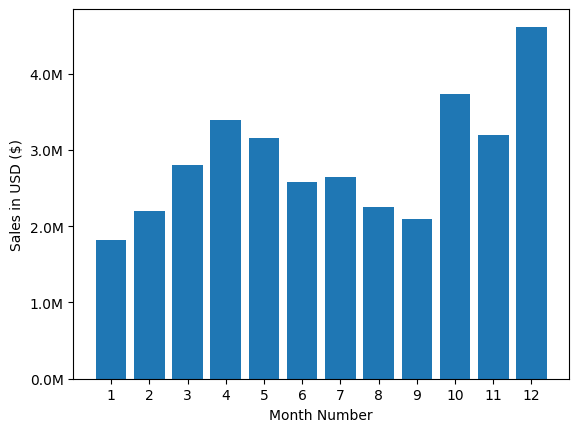

In [11]:
months = range(1, 13)

# Create a new figure and axis: 
fig, ax = plt.subplots()

# Plot the Data
ax.plot()

formatter = ticker.FuncFormatter(lambda x, pos:f'{x/1_000_000:0.1f}M')
ax.yaxis.set_major_formatter(formatter)

plt.bar(months, results['Sales'].astype(float))
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')
plt.show()

Trying another method for the plot and inserting labels to bars

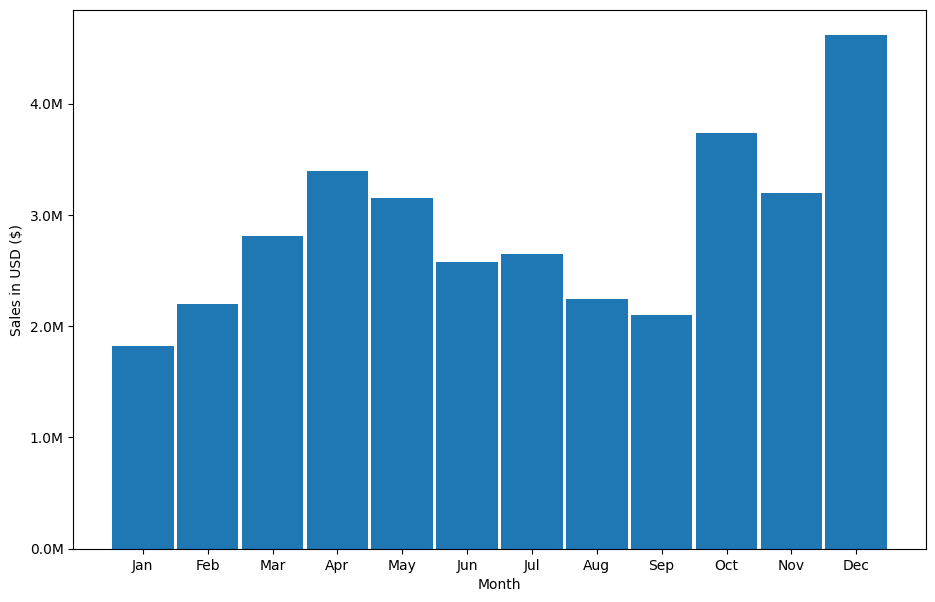

In [12]:
# Using Month abbrv. instead of numbers
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Creatig figures and axis:
fig, ax = plt.subplots(figsize=(11, 7))
barwidth = 0.95
#fig = plt.figure(figsize=(10, 6)) -- this line of code disables the ticker functions which reverts the yticks back to its scientific notation.


ax.plot()

formatter = ticker.FuncFormatter(lambda x, pos:f'{x/1_000_000:0.1f}M')
y_axis = ax.yaxis.set_major_formatter(formatter)

plt.bar(months, results['Sales'], width=barwidth)
plt.xticks(months)
plt.yticks(y_axis)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.show()


Cities with the highest sales.

Step 1: Adding a city column. Try using .apply() function
            
        Using .apply() and building a function (get_city), we can extract the city using .split() and use it as a column.
            
        To remove the overlapping city names from diff. states, we could build another function similar to get_city() to extract the state and add it to the 'City' column
Step 2: Using result variable to sum cities with their respective sales.

In [13]:
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4


In [14]:
# STEP 1:
# Using .apply() and building a function (get_city), we can extract the city using .split() and use it as a column

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1] # I forgot the [1] into the 2nd split to which "TypeError: can only concatenate str (not "list") to str" error occurs

alldata['City'] = alldata['Purchase Address'].apply(lambda x: get_city(x) + '  (' + get_state(x) + ')' )
#alldata['City'] = alldata['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})" ) # -- another way to put () into states called 'f strings'

# alldata['City'] = alldata['Purchase Address'].apply(lambda x: x.split(',')[1]) -- this is just using .split() without building a custom function


alldata['City'].head() # We can see that it did what we needed it to do.
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA)


In [16]:
# STEP 2:

results = alldata.groupby('City').sum()
results

C:\Users\Archmdz\AppData\Local\Temp\ipykernel_5600\438046056.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = alldata.groupby('City').sum()


,Quantity Ordered,Price Each,Sales,Month
City,,,,
Atlanta (GA),16602,2779908.20,2795498.58,104794
Austin (TX),11153,1809873.61,1819581.75,69829
Boston (MA),22528,3637409.77,3661642.01,141112
Dallas (TX),16730,2752627.82,2767975.40,104620
Los Angeles (CA),33289,5421435.23,5452570.80,208325
New York City (NY),27932,4635370.83,4664317.43,175741
Portland (ME),2750,447189.25,449758.27,17144
Portland (OR),11303,1860558.22,1870732.34,70621
San Francisco (CA),50239,8211461.74,8262203.91,315520


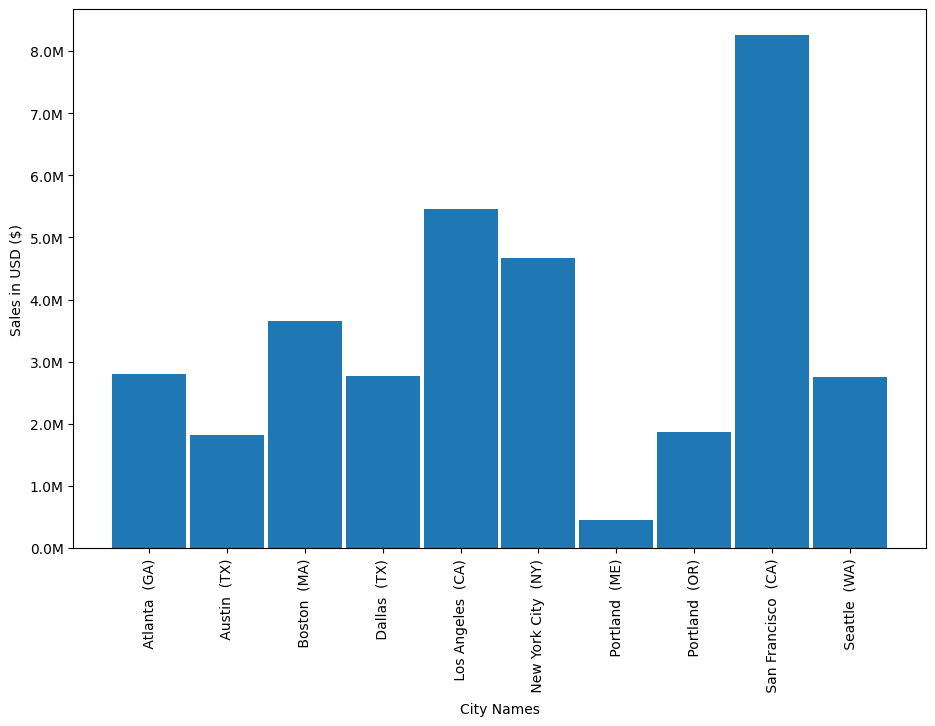

In [27]:
# cities = alldata['City'].unique() makes inconsistent plot compared to the results above
cities = [city for city, df in alldata.groupby('City')]

# Creatig figures and axis:
fig, ax = plt.subplots(figsize=(11, 7))
barwidth = 0.95

# Plotting data:
ax.plot()

formatter = ticker.FuncFormatter(lambda x, pos:f'{x/1_000_000:0.1f}M')
y_axis = ax.yaxis.set_major_formatter(formatter)

plt.bar(cities, results['Sales'], width=barwidth)
plt.xticks(cities, rotation='vertical')
plt.yticks(y_axis)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Names')
plt.show()


Maximizing the likelihood of customers buying a product based on what time to display advertisements.

In [40]:
# Converting Order Date format into pandas datetime format

alldata['Order Date'] = pd.to_datetime(alldata['Order Date'])
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA),9,27


In [46]:
alldata['Hour'] = alldata['Order Date'].dt.hour
alldata['Minute'] = alldata['Order Date'].dt.minute
alldata

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA),9,27
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97,9,Los Angeles (CA),20,56
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00,9,San Francisco (CA),16,0
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00,9,San Francisco (CA),7,39
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99,9,San Francisco (CA),17,30


In [42]:
results

,Quantity Ordered,Price Each,Sales,Month
City,,,,
Atlanta (GA),16602,2779908.20,2795498.58,104794
Austin (TX),11153,1809873.61,1819581.75,69829
Boston (MA),22528,3637409.77,3661642.01,141112
Dallas (TX),16730,2752627.82,2767975.40,104620
Los Angeles (CA),33289,5421435.23,5452570.80,208325
New York City (NY),27932,4635370.83,4664317.43,175741
Portland (ME),2750,447189.25,449758.27,17144
Portland (OR),11303,1860558.22,1870732.34,70621
San Francisco (CA),50239,8211461.74,8262203.91,315520


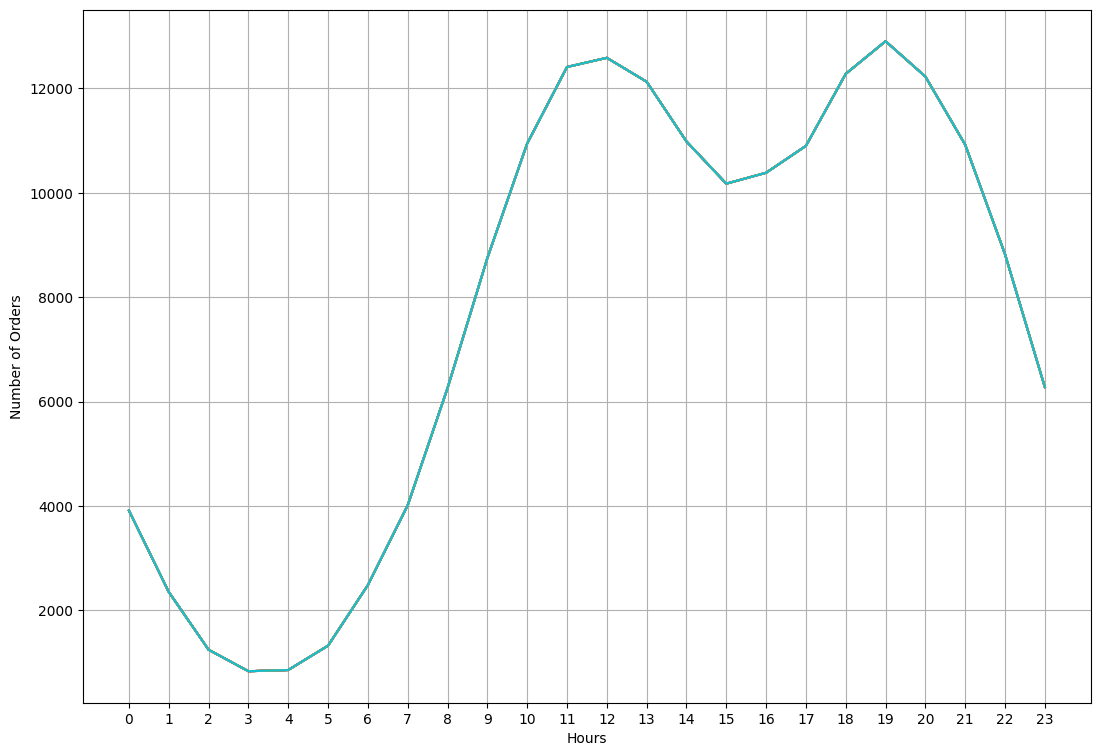

In [59]:
hours = [hour for hour, df in alldata.groupby('Hour')]

fig, ax = plt.subplots(figsize=(13, 9))
plt.plot(hours, alldata.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Number of Orders')

plt.show()

Based on the data:
    Advertisements should often be displayed around 12noon or 7pm where the number or orders are peaked.
    

Products most often sold together.

In [69]:
df = alldata[alldata['Order ID'].duplicated(keep = False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
#df.head()
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [70]:
from itertools import combinations
from collections import Counter

In [86]:
count = Counter()

for row in df['Grouped']:
    rowlist = row.split(',')
    count.update(Counter(combinations(rowlist, 2)))
    
#print(count)
#count.most_common(20)
for key, value in count.most_common(20):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58
('Lightning Charging Cable', 'AA Batteries (4-pack)') 55
('Lightning Charging Cable', 'Lightning Charging Cable') 54
('Bose SoundSport Headphones', 'Wired Headphones') 53
('AA Batteries (4-pack)', 'Lightning Charging Cable') 51
('AAA Batteries (4-pack)', 'USB-C Chargin

Product that sold the most.

In [87]:
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA),9,27


C:\Users\Archmdz\AppData\Local\Temp\ipykernel_5600\1855690579.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantityordered = productgroup.sum()['Quantity Ordered']


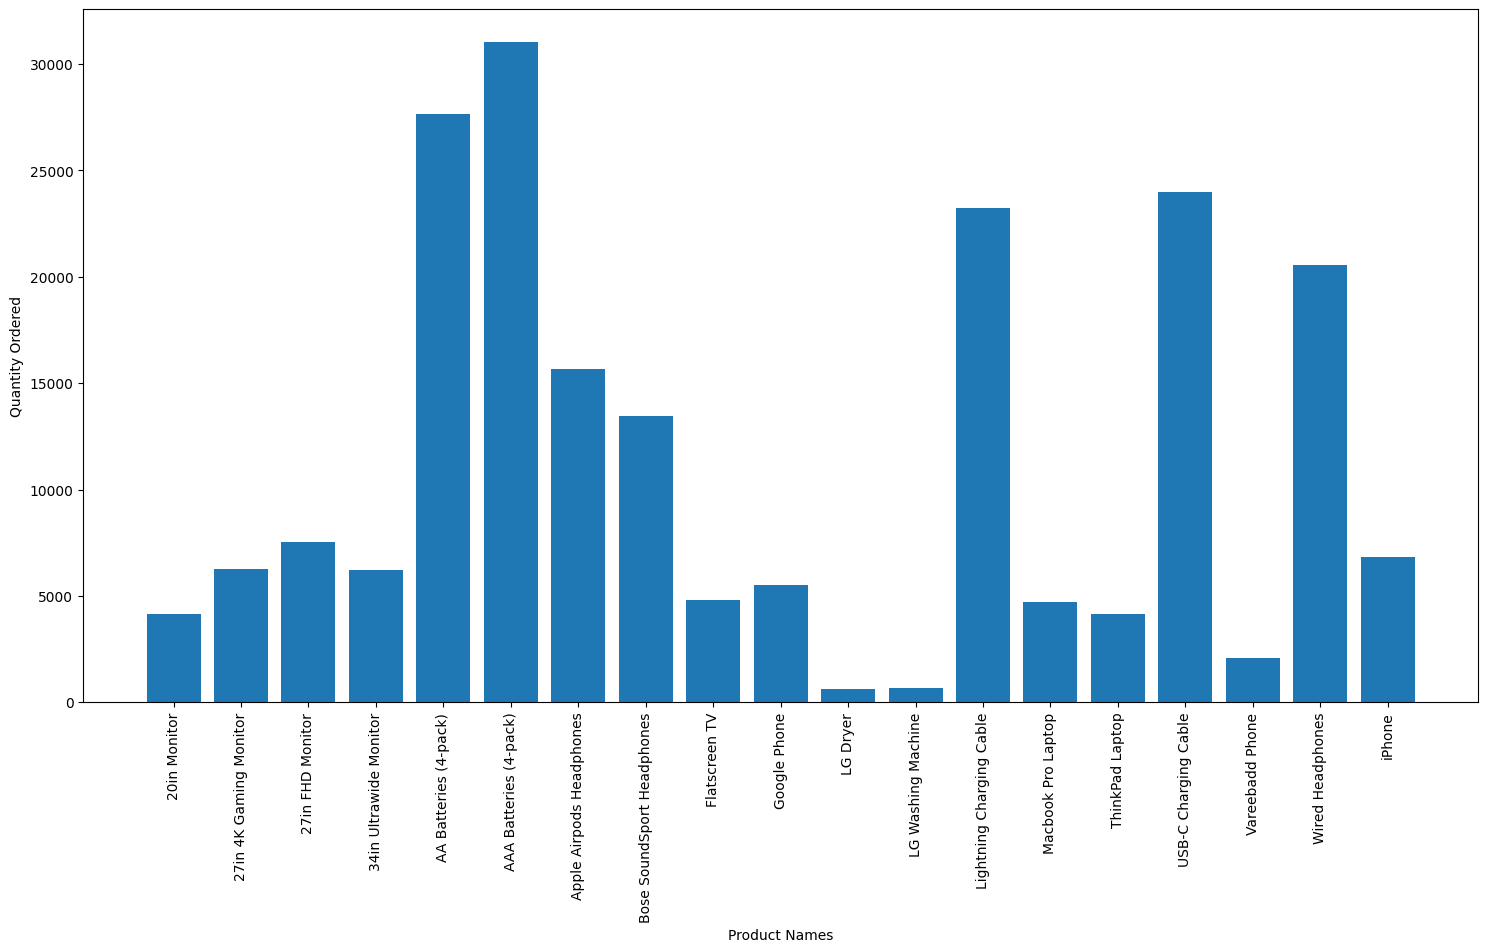

In [99]:
productgroup = alldata.groupby('Product')
#productgroup.sum()
quantityordered = productgroup.sum()['Quantity Ordered']
#quantityordered

products = [product for product, df in productgroup]

fig, ax = plt.subplots(figsize = (18, 9))

plt.bar(products, quantityordered)
plt.xticks(products, rotation='vertical', size=10)
plt.xlabel('Product Names')
plt.ylabel('Quantity Ordered')

plt.show()

AAA Batteries (4-pack) was the most sold item on the list.

Hypothesis:
AAA Batteries (4-pack) are one of the most cheapest items in the list.
A battery's lifespan is much shorter compared to other items.

In [101]:
prices = alldata.groupby('Product').mean()['Price Each']
prices

C:\Users\Archmdz\AppData\Local\Temp\ipykernel_5600\720259570.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = alldata.groupby('Product').mean()['Price Each']


Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

Testing the hypothesis.

C:\Users\Archmdz\AppData\Local\Temp\ipykernel_5600\4017045156.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = alldata.groupby('Product').mean()['Price Each']
C:\Users\Archmdz\AppData\Local\Temp\ipykernel_5600\4017045156.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=10)


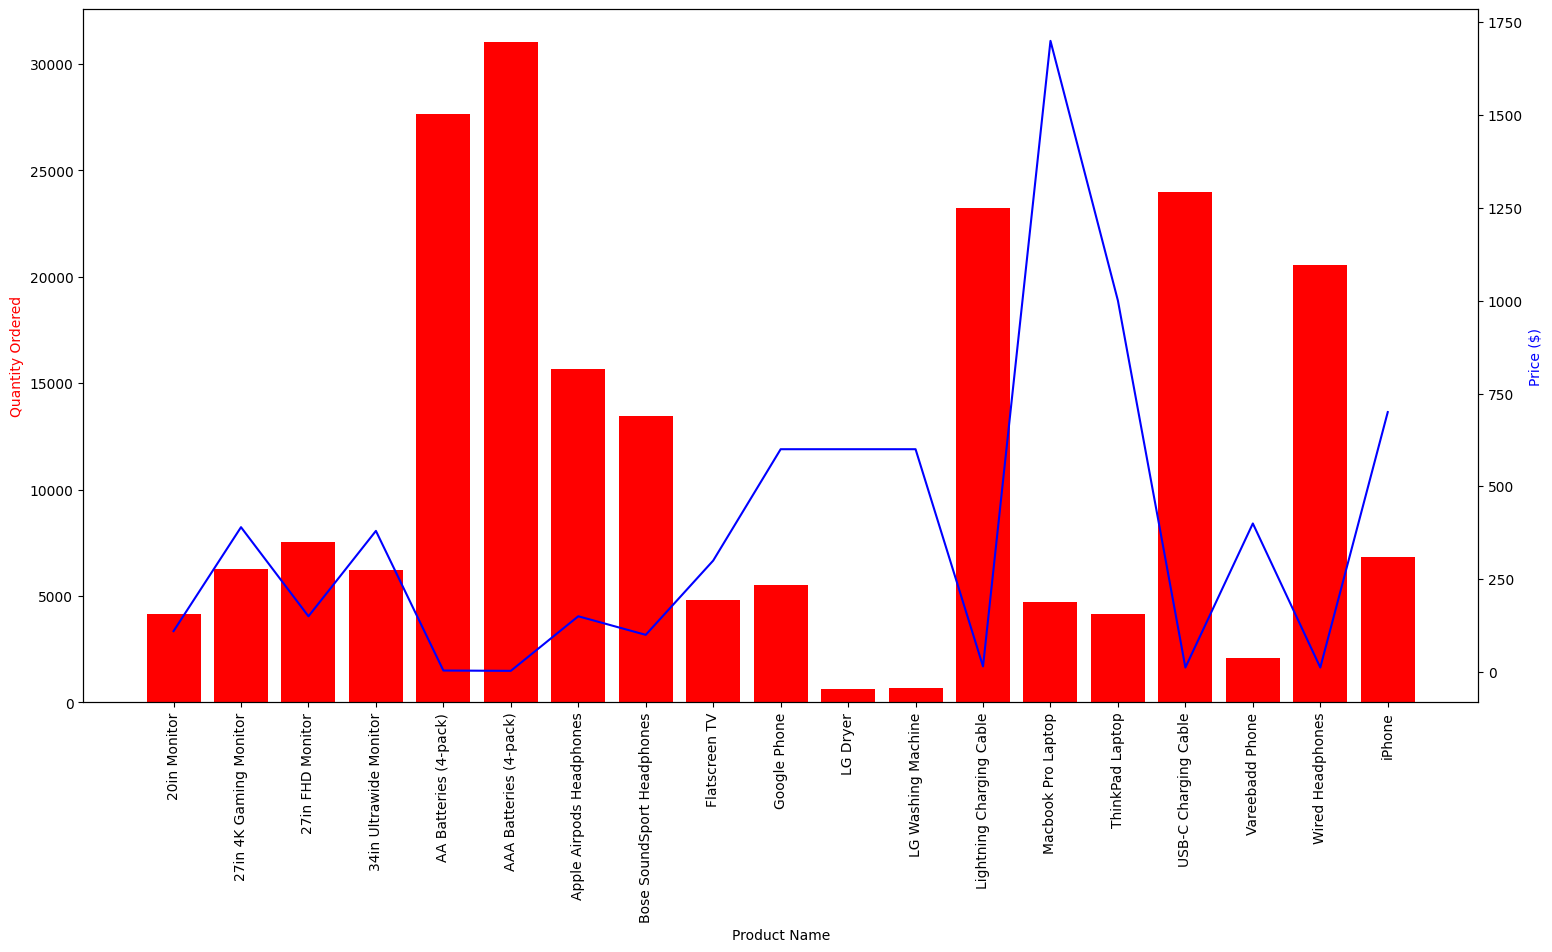

In [105]:
prices = alldata.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots(figsize = (18, 9))

ax2 = ax1.twinx()
ax1.bar(products, quantityordered, color = 'r')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='r')
ax1.set_xticklabels(products, rotation='vertical', size=10)
ax2.set_ylabel('Price ($)', color='b')

plt.show()